# CS247 Advanced Data Mining - Assignment 1
## Deadline: 11:59PM, January 24, 2023

## Instructions
Each assignment is structured as a Jupyter notebook, offering interactive tutorials that align with our lectures. You will encounter two types of problems: *write-up problems* and *coding problems*.

1. **Write-up Problems:** These problems are primarily theoretical, requiring you to demonstrate your understanding of lecture concepts and to provide mathematical proofs for key theorems. Your answers should include sufficient steps for the mathematical derivations.
2. **Coding Problems:** Here, you will be engaging with practical coding tasks. These may involve completing code segments provided in the notebooks or developing models from scratch.

To ensure clarity and consistency in your submissions, please adhere to the following guidelines:

* For write-up problems, use Markdown bullet points to format text answers. Also, express all mathematical equations using $\LaTeX$ and avoid plain text such as `x0`, `x^1`, or `R x Q` for equations.
* For coding problems, comment on your code thoroughly for readability and ensure your code is executable. Non-runnable code may lead to a loss of **all** points. Coding problems have automated grading, and altering the grading code will result in a deduction of **all** points.
* Your submission should show the entire process of data loading, preprocessing, model implementation, training, and result analysis. This can be achieved through a mix of explanatory text cells, inline comments, intermediate result displays, and experimental visualizations.

### Submission Requirements

* Submit your solutions through GradeScope in BruinLearn.
* Late submissions are allowed up to 24 hours post-deadline with a penalty factor of $\mathbf{1}(t\leq24)e^{-(\ln(2)/12)t}$.

### Collaboration and Integrity

* Collaboration is encouraged, but all final submissions must be your own work. Please acknowledge any collaboration or external sources used, including websites, papers, and GitHub repositories.
* Any suspicious cases of academic misconduct will be reported to The Office of the Dean of Students.

## Outline
* Problem 1: Naïve Bayes (50 points)
* Problem 2: Logistic Regression (50 points)
* Problem 3: Gaussian Mixture Models (70 points + 10 bonus points)

## Problem 1: Naïve Bayes (50 points) <a class="anchor" id="problem-1"></a>

### Exercise 1.1: MLE Estimation of Model Parameters (10 points)

Recall that given a corpus and labels for each document $D = \{(\boldsymbol{x}_d, y_d)\}_{d=1}^{|D|}$, the log likelihood function of a Bayes model parameterized by $\Theta = (\boldsymbol\beta_1, \boldsymbol\beta_2, \boldsymbol\beta_3, \boldsymbol\pi)$ is:
$$
\begin{align}
\mathcal{L}(\Theta) & = \log \prod_{d=1}^{|D|} p(\boldsymbol{x}_d, y_d | \Theta) \\
& = \sum_{d=1}^{|D|} \log p(\boldsymbol{x}_d, y_d | \Theta) \\
& = \sum_{d=1}^{|D|} \log [p(\boldsymbol{x}_d | y_d, \Theta) p(y_d | \Theta)] \\
& = \sum_{d=1}^{|D|} \left(\sum_{n=1}^{N}x_{dn}\log\beta_{y_d,n} + \log \pi_{y_d}\right).
\end{align}
$$
Show the MLE estimator of $\boldsymbol\beta$. Include necessary derivatives in your answer. (Hint: use Lagrange multipliers to enforce the constraint $\sum_{n=1}^{N}\beta_{j,n} = 1$ for all $j$.)

**[TODO: Write your answer here]**
To find the Maximum Likelihood Estimation estimator of $\beta$, need to maximize the log-likelihood function $\mathcal{L}(\Theta)$ with respect to $\boldsymbol\beta$. The log-likelihood function is given by: 
$$
\mathcal{L}(\Theta) = \sum_{d=1}^{|D|} \left(\sum_{n=1}^{N}x_{dn}\log\beta_{y_d,n} + \log \pi_{y_d}\right).
$$
To maximize $\mathcal{L}(\Theta)$, we can maximize each term separately. Let's consider a single term of the log-likelihood function:
$$
\mathcal{L}_d(\beta) = \sum_{n=1}^{N} x_{dn}\log\beta_{y_d,n} + \log \pi_{y_d}).
$$
let's introduce the constraint $\sum_{n=1}^{N}\beta_{j,n} = 1$ for all $j$, using Lagrange multipliers. We define the Lagrangian function as:
$$
\mathcal{J}_d(\beta,\lambda) = \mathcal{L}_d(\beta) + \lambda (\sum_{n=1}^{N} \beta_{j,n}-1).
$$
To find the MLE estimator, we need to find the values of $\boldsymbol\beta$ that maximize $\mathcal{J}_d(\boldsymbol\beta, \lambda)$. We can start by finding the partial derivatives of $\mathcal{J}d(\boldsymbol\beta, \lambda)$ with respect to $\beta{j,n}$ and $\lambda$ and set them to zero.
Taking the derivative with respect to $\beta_{j,n}$:
$$
\frac{\bigtriangledown \mathcal{J}_d(\beta,\lambda)}{\bigtriangledown \beta_{j,n}} = \frac{x_{dn}}{\beta_{j,n}}+\lambda.
$$

Setting the derivative to zero:

$$
\frac{x_{dn}}{\beta_{j,n}}+\lambda = 0
$$
Solving for $\beta_{j,n}$:
$$
\beta_{j,n} = - \frac{x_{dn}}{\lambda}
$$
<!-- Next, taking the derivative with respect to $\lambda$:
$$
\frac{\bigtriangledown \mathcal{J}_d(\beta,\lambda)}{\bigtriangledown \lambda} = \sum_{n=1}^{N}\beta_{j,n}-1
$$
Setting the derivative to zero:
$$
\sum_{n=1}^{N}\beta_{j,n}-1 =0
$$
Substituting the expression for $\beta_{j,n}$: -->


### Execrise 1.2: Implementation of Naïve Bayes in scikit-learn (10 points)

In this exercise, you will learn the basics of using scikit-learn to implement a Naïve Bayes classifier. We will use the [Sentiment Polarity Dataset Version 2.0](https://www.cs.cornell.edu/people/pabo/movie-review-data/) for this exercise. This dataset contains 1000 positive and 1000 negative reviews. We have provided the code for dataset preprocessing.

In [1]:
# Download and load the dataset

import nltk
from sklearn.datasets import load_files

nltk.download('movie_reviews', download_dir='.', quiet=True)
reviews = load_files('./corpora/movie_reviews', shuffle=True)

In [2]:
# Sentiment analysis: `neg` for negative sentiment, `pos` for positive sentiment
reviews.target_names

['neg', 'pos']

In [3]:
# Number of reviews
len(reviews.data)

2000

In [4]:
# Split the dataset into training and test sets

from sklearn.model_selection import train_test_split
reviews_train, reviews_test, y_train, y_test = train_test_split(
    reviews.data, reviews.target, test_size=0.20, random_state=12)

In [5]:
# Dataset preprocessing: convert reviews to a matrix of token counts

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer().fit(reviews.data) 
X_train = count_vect.transform(reviews_train).toarray()
X_test = count_vect.transform(reviews_test).toarray()

#### Exercise 1.2.1 (8 points)
Train the multinomial Naïve Bayes model on the training set and test it on the test set. Report the accuracy of the model on the test set.
You would be able to achieve accuracy of around 80% on the test set.

(Hint: Refer to the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) for more details on how to use the `MultinomialNB` class.)

In [6]:
# Train and test with MultinomialNB

import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
clf = MultinomialNB()

# TODO: Use the `MultinomialNB` class to train the model on the training set and test it on the test set
clf.fit(X_train, y_train)

# TODO: Report the accuracy of the model on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8175


#### Exercise 1.2.2 (2 points)
There are two functions of the Naïve Bayes classifier in order to get the probabilities of the predictions: `predict_proba` and `predict_log_proba`. What is the difference between them? What is the advantage of using `predict_log_proba` over `predict_proba`?

(Hint: If you are unsure about this question, please proceed to Exercise 1.3.1 and come back to this question later.)

**[TODO: Write your answer here]**

Difference：
  predict_proba returns the estimated probabilities of the predicted classes .The probabilities are normalized, meaning that the sum of probabilities for each sample will be equal to 1.The probabilities are in their original scale (not logarithmic)
predict_log_proba returns the logarithm of the estimated probabilities of the predicted classes. 

Advantage of  using `predict_log_proba` over `predict_proba`:
a.Taking logarithms can help prevent underflow or loss of precision when dealing with very small probabilities.
b. Logarithms can simplify calculations.
c.  predict_log_proba can be compared more easily.


### Exercise 1.3: Your Implementation of Naïve Bayes (30 points)

In this exercise, you will implement a Naïve Bayes classifier by yourself and compare it with the scikit-learn implementation. You will use the same dataset as in Exercise 1.2.
We have provided a code skeleton for your implementation.

#### Exercise 1.3.1 (24 points)
Implement the `fit`, `predict_proba`, and `predict_log_proba` methods in the `NaiveBayes` class, according to what we have learned from lectures.
Each implementation is worth 8 points.
Please try to optimize for efficiency. Your code should run in seconds.

In [36]:
class NaiveBayes(object):
    """
    Your implementation of Naive Bayes classifier.
    """

    def __init__(self, alpha=1.0):
        """
        Initialize the Naive Bayes classifier.
        
        Parameters
        ----------
        alpha : float, default=1.0
            Additive (Laplace/Lidstone) smoothing parameter
            (0 for no smoothing).
        """

        self.alpha = alpha
    
    def fit(self, X, y):
        """
        Fit the Naive Bayes classifier on the training set (X, y).
        
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training vectors, where n_samples is the number of samples
            and n_features is the number of features.
        y : array-like, shape (n_samples,)
            Target values.
        """

        self.n_features = X.shape[1]
        self.n_samples = X.shape[0]
        self.n_classes = np.unique(y).shape[0]

        self.beta = np.zeros((self.n_classes, self.n_features))
        self.pi = np.zeros(self.n_classes)

        # TODO: Given (X, y), compute the parameters `beta` and `pi`
        # (Hint: Calculate `beta` according to the frequencies of words
        #    and `pi` according to the class frequencies.
        #    Remember to consider `alpha` for the Laplace smoothing.)
        
        for i in range(self.n_samples):
            if y[i] == 1:
#                 self.pi[1] += 1
                self.beta[1] += X[i]
            else:
#                 self.pi[0] += 1
                self.beta[0] += X[i]

#         self.pi /= self.n_samples
        self.beta += self.alpha  # Add Laplace smoothing
#         self.beta[1] += self.alpha  # Add Laplace smoothing
        self.beta /= np.sum(self.beta, axis=1)[:, np.newaxis]  # 归一化
        
        unique_classes, class_counts = np.unique(y, return_counts=True)
        total_samples = y.size
        for class_label, class_count in zip(unique_classes, class_counts):
            self.pi[class_label] = class_count / total_samples
            

        self.log_beta = np.log(self.beta)
        self.log_pi = np.log(self.pi)
        
        

    def predict_proba(self, X):
        """
        Return posterior probabilities of classification for X.
        
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Test vectors, where n_samples is the number of samples
            and n_features is the number of features.
        
        Returns
        -------
        y_prob : array-like, shape (n_samples, n_classes)
            Posterior probabilities of classification per class.
        """

        # TODO: Given `X``, return the posterior probabilities of classification
        # (Hint: Use `beta`` and `pi`. Remember to normalize the probabilities.)
        n_samples, _ = X.shape
        probabilities = np.zeros((n_samples, 2))

        for i in range(n_samples):
            probabilities[i, 0] = np.prod(self.beta[0] ** (1 - X[i]) * (1 - self.beta[0]) ** X[i]) * self.pi[0]
            probabilities[i, 1] = np.prod(self.beta[1] ** (1 - X[i]) * (1 - self.beta[1]) ** X[i]) * self.pi[1]

#         probabilities /= np.sum(probabilities, axis=1)[:, np.newaxis] 
        return probabilities
    
        

    def predict_log_proba(self, X):
        """
        Return posterior log probabilities of classification for X.
        
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Test vectors, where n_samples is the number of samples
            and n_features is the number of features.
        
        Returns
        -------
        y_log_prob : array-like, shape (n_samples, n_classes)
            Posterior log probabilities of classification per class.
        """

        # TODO: Given X, return the posterior log probabilities of classification
        # (Hint: Use `log_beta`` and `log_pi`.)

        log_probabilities = []
        for sample in X:
            class_scores = []
            for class_label in range(2):
                # Calculate the probability score under a given category
                score = np.sum(np.log(self.beta[class_label]) * sample +
                               np.log(1 - self.beta[class_label]) * (1 - sample)) + np.log(self.pi[class_label])
                class_scores.append(score)

            # The probability scores are normalized and converted to logarithmic probabilities
            log_scores = class_scores - np.max(class_scores)
            log_probabilities.append(log_scores - np.log(np.sum(np.exp(log_scores))))

        return np.array(log_probabilities)
    

    def predict(self, X):
        log_probabilities = self.predict_log_proba(X)
        return np.argmax(log_probabilities, axis=1)
    
    

In [37]:
my_clf = NaiveBayes()
my_clf.fit(X_train, y_train)

# Sanity checks
assert my_clf.n_features == X_train.shape[1]
assert my_clf.n_samples == X_train.shape[0]
assert my_clf.n_classes == np.unique(y_train).shape[0]
assert my_clf.beta.shape == (my_clf.n_classes, my_clf.n_features)
assert my_clf.pi.shape == (my_clf.n_classes,)
assert np.isclose(my_clf.pi.sum(), 1)
assert np.allclose(my_clf.beta.sum(axis=1), 1)

#### Exercise 1.3.2 (6 points)

Compare the performance of your implementation with sklearn's implementation on the test set.
Report the accuracy of both implementations on the test set.
Ideally, you should be able to achieve accuracy of around 80% on the test set, similar to the scikit-learn implementation.

In [39]:
# TODO: Report the accuracy of your implementation on the test set
y_pred = my_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8175


## Problem 2: Logistic Regression (50 points)

In this problem, we review the classification model known as logistic regression. This model is motivated from a probabilistic perspective, hence we start with this formulation. In the following, we assume that:
- Data (boldfont, uppercase X) $\mathbf{X} \in \mathbb{R}^{n\times d}$, $n$ is the number of data points and $d$ the number of features.
- $\mathbf{x}_i$ is a single data point and $\mathbf{x}_i \in \mathbb{R}^d$.
- $\mathbf{Y} \in \mathbb{R}^n$ are the labels of the data points, $Y_i$ is the label of $\mathbf{x}_i$.
- We denote (uppercase letter) $X,Y,Z$,... to be __random variables__, which are measurable maps from the sample space to the real line: $X: \Omega \rightarrow \mathbb{R}$
- We denote $P_X$ to be the __probability distribution__ associated with the random variable $X$.
- We denote $f_X$ to be the __probability density function (pdf)__ associated with the random variable $X$, if it exists. If the random variable is discrete, then we also use $P_X$ to denote its __probability mass function (pmf)__.

### Exercise 2.1: Maximum Likelihood Formulation (12 points)

Maximum Likelihood Estimation (MLE) is the most standard probabilistic learning framework. In this formulation, we:
- Assume that __conditional distribution of label given data__, $P(\mathbf{Y}\mid\mathbf{X})$, follows a parametric probabilistic distribution.
- Assume that data pairs are sampled __independently and identically (i.i.d)__ from the distribution. This means $P_{Y\mid X} := P(\mathbf{Y}\mid\mathbf{X}) = \prod_{i=1}^n P(\mathbf{y}_i\mid\mathbf{x}_i)$.

__As a technical note__, here $P$ is the probability distribution for the random variable $Y\mid\mathbf{X}$, not the _probability density function (pdf)_; however, for well-behaved distributions, such as those from the __exponential family__ (including Gaussian, Bernoulli, Poisson, Exponential, etc.), we can just use their pdfs in the case of independence. This means if i.i.d assumption holds, then the joint density function factorizes:
$$
f_{X}(x_1,x_2,\cdots, x_n) = f_{X_1,X_2,\cdots, X_n}(x_1,x_2,\cdots, x_n) = \prod_{i=1}^n f_{X_i}(x_i)
$$

__Example__: In the case of linear regression, we have that $P_{y_i\mid\mathbf{X}_i} \sim \mathcal{N}(y_i; W^\top \mathbf{X}_i + b_i, \Sigma)$. In this case we have
$$
f_{Y\mid X}(x_1, x_2, \cdots, x_n, y_1, \cdots, y_n) = \prod_{i=1}^n f_{Y_i\mid X_i}(x_i) = \prod_{i=1}^n \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}\exp \left\{-\frac{1}{2} (y_i - W^\top \mathbf{x}_i - b_i)^\top \Sigma^{-1} (y_i - W^\top \mathbf{x}_i-b_i) \right\}
$$

To perform a MLE inference, we need to obtain the __likelihood function__, which for exponential family distributions, can simply be written as the joint density function above, but now we change the notation since for likelihood function, __parameters of the distributions are treated as inputs__, e.g.:
$$
L(W, b, \Sigma) = \prod_{i=1}^n \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}\exp \left\{-\frac{1}{2} (y_i - W^\top \mathbf{x}_i - b_i)^\top \Sigma^{-1} (y_i - W^\top \mathbf{x}_i-b_i) \right\}
$$

However, product term is tricky to deal with, we hence need __log-likelihood__ function. $l(W,b,\Sigma) = \log L(W,b,\Sigma)$ to turn the product into summation. From their on, we can invoke any optimization algorthm (or do it by hand), to maximize the log-likelihood function.

Now, the exercise is to write down the formulation of MLE for the following two classes of distributions.

#### Exercise 2.1.1 (3 points)

Write down the log-likelihood function for $n$ i.i.d random samples from the Bernoulli distribution, which has distribution function
$$P_X(x_i;p) = p^{x_i}(1-p)^{(1-x_i)}$$
where $p\in [0,1]$ and $x_i \in \{0,1\}$.

**[TODO: Write your answer here]**

$$
L(p) = log(\prod_{i=1}^n P_X(x_i,p)) \\
    = log(prod_{i=1}^n p^{x_i}(1-p)^{1-x_i}) \\
   = \sum _{i=1}^n x_i log(p) + (1-x_i)log(1-p)
$$
Where $L(p)$ represents the log-likelihood function for the observed data $x_1, x_2, \ldots, x_n$ given the parameter $p$. The goal of maximum likelihood estimation would be to find the value of $p$ that maximizes this log-likelihood function.

#### Exercise 2.1.2 (3 points)

Write down the log-likelihood function for $n$ i.i.d random samples from the Poisson distribution, which has distribution function
$$P_X(x_i; \lambda) = \frac{\lambda^{x_i} e^{-\lambda}}{{x_i}!}$$
where $x_i \in \{1,2,\cdots,\}$.  

**[TODO: Write your answer here]**

$$L(p) = ∏𝑖=1^𝑛 𝑃_𝑋(𝑥_𝑖; 𝑝)$$

#### Exercise 2.1.3 (3 points)

Write down the __negative log-likelihood__ function for the logistic regression model applied to $n$ data points, where for each observed pair $(\mathbf{x}_i, y_i)$, we assume that $P_{y_i\mid X_i} \sim \text{Bernoulli}(\sigma(W^\top \mathbf{x}_i))$.

(Hint: Refer to Exercise 2.1.1 for the parametric form. Also you don't need to write down exact formula for the sigmoid function $\sigma$.)

**[TODO: Write your answer here]**
$$𝐿(𝑊) = -∑𝑖=1^𝑛 [𝑦_𝑖 log(𝜎(𝑊^⊤𝐱_𝑖)) + (1−𝑦_𝑖) log(1 − 𝜎(𝑊^⊤𝐱_𝑖))]$$

#### Exercise 2.1.4 (3 points)

Suppose you want to perform maximum likelihood inference for Gaussian, Poisson, and Bernoulli random variables. What would be the difference, in terms of optimization procedure, when you deal with these three random variables?

(Hint: Think about the values the parameters of these distributions can take.)

**[TODO: Write your answer here]**

Difference: 
```  
Gaussian,the likelihood function is typically expressed as the product of the probability density function values for each observed data point. 
Poisson,the likelihood function is expressed as the product of the probability mass function values for each observed count.
Bernoulli, the likelihood function is expressed as the product of the probability mass function values for each observed binary outcome.

```

### Exercise 2.2: Implemention of Logistic Regression (38 points)

In [40]:
# Dependencies
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt

from sklearn import metrics
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split

#### Exercise 2.2.1 (8 points)
Analytically calculate the gradient of logistic regression negative log-likelihood with respect to parameter $W$. Show all of your steps.

**[TODO: Write your answer here]**


define the logistic regression negative log-likelihood function for $𝑛$ data points:

$𝐿(𝑊) = -∑𝑖=1^𝑛 [𝑦_𝑖 log(𝜎(𝑊_⊤𝐱_𝑖)) + (1−𝑦_𝑖) log(1 − 𝜎(𝑊^⊤𝐱_𝑖))]$

where $𝑊$ is the parameter vector, $𝐱_𝑖$ is the feature vector for the $𝑖$-th data point, and $𝑦_𝑖$ is the corresponding binary label (0 or 1).

To calculate the gradient, we need to differentiate $𝐿(𝑊)$ with respect to each component of $𝑊$. Let's consider the $𝑘$-th component of $𝑊$. We will denote it as $𝑊[𝑘]$.

Step 1: Differentiate the sigmoid function $𝜎(𝑊^⊤𝐱)$ with respect to $𝑊[𝑘]$:

$𝜕𝜎(𝑊^⊤𝐱) / 𝜕𝑊[𝑘] = 𝜎(𝑊^⊤𝐱) (1 - 𝜎(𝑊^⊤𝐱)) 𝜕(𝑊^⊤𝐱) / 𝜕𝑊[𝑘]
= 𝜎(𝑊^⊤𝐱) (1 - 𝜎(𝑊^⊤𝐱)) 𝑥[𝑘]$

Step 2: Differentiate the log-likelihood function $𝐿(𝑊)$ with respect to $𝑊[𝑘]$:


$𝜕𝐿(𝑊) / 𝜕𝑊[𝑘] = -∑𝑖=1^𝑛 [𝑦_𝑖 𝜕log(𝜎(𝑊^⊤𝐱_𝑖)) / 𝜕𝑊[𝑘] + (1−𝑦_𝑖) 𝜕log(1 − 𝜎(𝑊^⊤𝐱_𝑖)) / 𝜕𝑊[𝑘]]$

Using the chain rule, we can express the partial derivatives in terms of the derivatives of the sigmoid function:


$𝜕log(𝜎(𝑊^⊤𝐱^𝑖)) / 𝜕𝑊[𝑘] = 𝜕log(𝜎(𝑊^⊤𝐱^𝑖)) / 𝜕𝜎(𝑊^⊤𝐱_𝑖) * 𝜕𝜎(𝑊^⊤𝐱_𝑖) / 𝜕𝑊[𝑘]
= 𝑦_𝑖 (1 - 𝜎(𝑊^⊤𝐱_𝑖)) 𝑥[𝑘]$

$𝜕log(1 − 𝜎(𝑊^⊤𝐱_𝑖)) / 𝜕𝑊[𝑘] = 𝜕log(1 − 𝜎(𝑊^⊤𝐱_𝑖)) / 𝜕𝜎(𝑊^⊤𝐱_𝑖) * 𝜕𝜎(𝑊^⊤𝐱_𝑖) / 𝜕𝑊[𝑘]
= - (1 - 𝑦_𝑖) 𝜎(𝑊^⊤𝐱_𝑖) 𝑥[𝑘]$

Step 3: Substitute the expressions for the partial derivatives into the gradient expression:

$𝜕𝐿(𝑊) / 𝜕𝑊[𝑘] = -∑𝑖=1^𝑛 [(𝑦_𝑖 - 𝜎(𝑊^⊤𝐱_𝑖)) 𝑥[𝑘]]$

represents the contribution of each data point to the gradient calculation. It indicates how much each data point influences the update of the parameter $𝑊[𝑘]$ during the optimization process.


In the following exercises, we load a sample dataset, and then implement a logistic regression model by hand; in the end, we compare the prediction performance with a standard logistic regression model from the scikit-learn library.

In [76]:
sample_data = pd.read_csv("sample_data.txt", delimiter=",")
n,d = sample_data.shape
sample_data.columns = ["score_1", "score_2", "label"]
X = sample_data[["score_1", "score_2"]].values
y = sample_data["label"].values.reshape(-1,1)
print(X.shape)
print(y.shape)

(99, 2)
(99, 1)


In [77]:
np.random.seed(1234)
W_init = np.random.randn(d,1)
W_init.shape

(3, 1)

#### Exercise 2.2.2 (10 points)
Implement a logistic regression model by hand, by specifying the following functions:
- `sigmoid(x)` which implements the sigmoid function
- `cost_function(W, X, y)`, which returns the negative log-likelihood and the gradient with respect to parameter `W`

(Hint: Tou may want to deal with numerical issues with `log` with something like `eps=1e-6`.)

In [78]:
def sigmoid(x):
    # TODO: Implement the sigmoid function
    return 1 / (1 + np.exp(-x))
    pass

In [79]:
# W: Model parameters of shape (d,1)
# X: Input of shape (N,d)
# y: Input of shape (N,1)
# Returns: Negative-log-likelihood, gradient
def cost_function(W, X, y):
    # TODO: Implement the negative log-likelihood function and its gradient with respect to parameter `W`
    # Number of data points
    n = X.shape[0]

    # Add a column of ones to X for the bias term
    X = np.column_stack((np.ones((n, 1)), X))

    # Compute the linear transformation of input features
    z = np.dot(X, W)

    # Compute the sigmoid of the linear transformation
    h = sigmoid(z)

    # Compute the negative log-likelihood
    J = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))

    # Compute the gradient
    gradient = np.dot(X.T, (h - y)) / n

    return J, gradient
    pass

#### Exercise 2.2.3 (6 points)

Implement gradient descent and use it to train the logistic regression model.

In [80]:
"""
Gradient descent algorithm: update the parameter `W` at each iteration
Returns: 
    - A `List` recording losses at each iteration
    - The final optimal value of `W`
"""
def gradient_descent(X, y, W, learning_rate, n_iters):
    # TODO: Implement the gradient descent algorithm
    # Initialize the parameter vector
    records = []
    # Perform gradient descent
    for iteration in range(n_iters):
        # Compute the negative log-likelihood and gradient
        cost, gradient = cost_function(W, X, y)

        # Update the parameters
        W = W - (learning_rate * gradient)

        records.append((cost, W))
    
    return records, W

In [68]:
# TODO: Run gradient descent and obtain the records alongside optimal `W` 

W = W_init # np.zeros(d + 1)
learning_rate = 0.1
num_iterations = 10
# Train the logistic regression model and obtain records
records = gradient_descent(X, y, W, learning_rate, num_iterations)

# Print the records alongside the optimal parameters
for iteration, params in enumerate(records):
    print(f'Iteration {iteration}: Parameters = {params}')


Iteration 0: Parameters = [(nan, array([[ 0.46414515],
       [-0.63780094],
       [ 0.91474864]])), (nan, array([[ 0.44700916],
       [-0.88650582],
       [-0.19611297]])), (48.66397586470026, array([[0.50761522],
       [3.64191374],
       [4.28609322]])), (nan, array([[0.46822128],
       [1.57457193],
       [2.15802151]])), (nan, array([[ 0.42882734],
       [-0.49276987],
       [ 0.0299498 ]])), (20.71237988931243, array([[0.48943339],
       [4.03564931],
       [4.51215518]])), (nan, array([[0.45003945],
       [1.96830751],
       [2.38408347]])), (nan, array([[ 0.41064551],
       [-0.09903429],
       [ 0.25601176]])), (3.5778386513386518, array([[ 0.37260584],
       [-2.04975555],
       [-1.82006295]])), (174.1746836673115, array([[0.4332119 ],
       [2.47866401],
       [2.66214323]]))]
Iteration 1: Parameters = [[0.4332119 ]
 [2.47866401]
 [2.66214323]]


C:\Users\Dell\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\Dell\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply


#### Exercise 2.2.4 (6 points)

Plot the training curve (y-axis as the negative log-likelihood, and x-axis as training iterations), and experiment on different learning rates and `n_iters` to ensure convergence.

C:\Users\Dell\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\Dell\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply


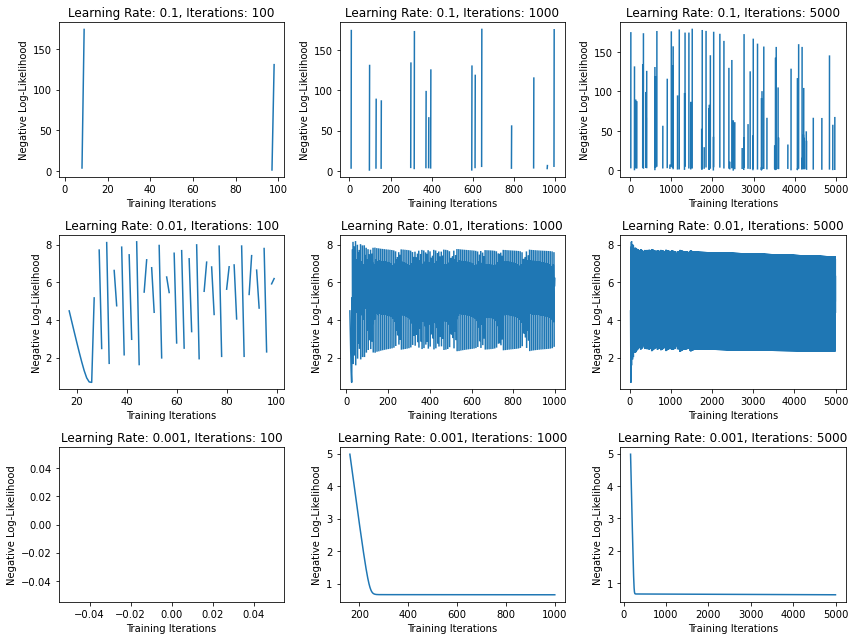

In [81]:
# TODO: Use matplotlib to plot the losses and show convergence
learning_rates = [0.1, 0.01, 0.001]
num_iterations = [100, 1000, 5000]

# Plot the training curve for different learning rates and number of iterations
fig, axs = plt.subplots(len(learning_rates), len(num_iterations), figsize=(12, 9))

for i, lr in enumerate(learning_rates):
    for j, iterations in enumerate(num_iterations):
        # Train the logistic regression model and obtain records
        records, optimal_params = gradient_descent(X, y, W_init, lr, iterations)

        # Extract the cost values from the records
        costs = [record[0] for record in records]

        # Plot the training curve
        ax = axs[i, j]
        ax.plot(range(iterations), costs)
        ax.set_title(f'Learning Rate: {lr}, Iterations: {iterations}')
        ax.set_xlabel('Training Iterations')
        ax.set_ylabel('Negative Log-Likelihood')

plt.tight_layout()
plt.show()


#### Exercise 2.2.5 (8 points)

Use the `sklearn.linear_model.LogisticRegression` model to fit the given `X` and `y`, then report the optimum values obtained from this model and compare with the result from Exercise 2.2.3.
Are the optimal value of parameters similar? If so, explain why. If not, explain what may cause the difference between your implementation and the one from sklearn.

In [82]:
# TODO: scikit-learn logistic regression
import numpy as np
from sklearn.linear_model import LogisticRegression

# Fit Logistic Regression model
model = LogisticRegression()
model.fit(X, y)

# Obtain the optimal parameter values
optimal_params_sklearn = np.concatenate((model.intercept_, model.coef_.flatten()))

# Obtain the optimal parameter values from Exercise 2.2.3
optimal_params_custom = gradient_descent(X, y,W_init, learning_rate=0.1, n_iters=1000)[-1]

print("Optimal parameters from sklearn:", optimal_params_sklearn)
print("Optimal parameters from Exercise 2.2.3:", optimal_params_custom)

Optimal parameters from sklearn: [-24.76261953   0.20251777   0.19901181]
Optimal parameters from Exercise 2.2.3: [[-7.06131193]
 [ 2.85984684]
 [ 2.97938707]]


C:\Users\Dell\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dell\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\Dell\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply


**[TODO: Write your answer here]**
```
Their results are different, probably because of the choice of hyperparameters.

The learning rate and number of iterations used in the gradient descent algorithm for Exercise 2.2.3 can affect convergence and the resulting optimal parameter values. Choosing appropriate hyperparameters is crucial for achieving similar results.
```


## Problem 3: Gaussian Mixture Model (70 points + 10 bonus points)

In this problem, we will review a commonly used __latent variable model__ called Gaussian Mixture Model (GMM). In particular, we will focus on the property of learning this model, first from the perspective of MLE and then from the perspective of surrogate optimization, using what is known as the __Expectation Maximization (EM)__ algorithm.

### Exercise 3.1: Full Distribution of GMM (6 points)

We know that for _generative modeling_, the dataset is assumed to be generated from some probabilistic distribution, and the goal of GMM is to estimate the underlying distribution of the dataset. Here the assumption is implicitly that the data is generated by a probability distribution smooth enough, such that we can estimate its probability density function (pdf). Hence the terminology for this task is known as __density estimation__. A straightforward application of density estimation is the task of __clustering__, e.g., determining the possible __modes__ of the probability density function (each cluster center can be seen as the mode of a pdf). Therefore, from this perspective, we can make the following observations about K-Means and GMM:

- K-Means is an algorithm that targets the task of clustering specifically, while GMM is more powerful in that it deals with density estimation, and by this virtue it can also be used for clustering.
- In the context of clustering, GMM assigns data points _softly_, that is, with some probability, to a cluster, whereas K-means provides _hard assignments_ of elements to clusters.

Suppose that the dataset contains $n$ elements $\{x_1, \cdots, x_N\}$ and we assume $k$ cluster centers (or distribution modes). Now we take a look at the generative modeling story that GMM is telling: as a latent variable model, each observed data point $\mathbf{x}_i$ is associated with two random variables $Z_i, X_i$, such that $P_{X_i,Z_i} = P_{Z_i}P_{X_i\mid Z_i}$ where:


- $Z_i \sim Cat(\pi_1, \cdots, \pi_k)$, where $k$ represents $k$ pdf modes (clusters) and $\sum_{j=1}^k \pi_j = 1$; this random variable is quantifies the event \{$\mathbf{x}_i$ belongs to cluster $j$\}, and $P(Z_j = i) = \pi_i$.

Now comes the trickier bit, where we specify a __conditional distribution__ $X_i\mid Z_i=j$. This means __after observing that $\mathbf{x}_i$ is in cluster $j$, what is the distribution of $x_i$?__. The GMM assumes this follows a Gaussian with mean and variance determined by the clsuter $j$:

- $X_i\mid Z_i = j \sim \mathcal{N}(\mu_j, \Sigma_j)$, where the index $j \in \{1,\cdots, N\}$ and index $j\in\{1,\cdots, k\}$. We can see that each random variable $X_i\mid Z_i=j$ is distributed as a Gaussian, whose parameters are determined by the cluster it belongs to.

The plate diagram for this _Probabilistic Graphical Model_ is given below, where the empty circle represents the latent variable (since we cannot observe the clusters a priori).

![](bishop-gaussian-mixture.png)

This plate diagram tells us that there are in total $2N$ random variables, two for each observed data point. It also allows us to write down the joint density function, where again we have the i.i.d assumption of each random variable pair $(X_i,Z_i)$ and we denote the full joint distribution as $P_{XZ}$ (and the full joint pdf as $f_{XZ}$) and the individual joint distribution to be $P_{X_iZ_i}$(and the individual joint pdf to be $f_{X_iZ_i}$):

$$
f_{X_iZ_i}(\mathbf{\mathbf{x}_i}, k) = P(Z_i = k) f_{X}(\mathbf{x_i} \mid \mu_k, \Sigma_k) = \pi_k \mathcal{N}(\mathbf{x}; \mu_k, \Sigma_k)
$$


__Please strictly follow the notation used in this notebook, as your true understanding of the model should not change with a change of notation__!

#### Exercise 3.1.1 (3 points)

Write down the full derivation of the joint density function $f_{XZ}$ from the formula above.

(Hint: Write down the correct pdf for each random variable, then use the assumption of i.i.d to factorize it. Note that $\mathbf{x}_i \in \mathbb{R}^d$.)

**[TODO: Write your answer here]**

To obtain the joint density function 𝑓𝑋𝑍, we need to multiply the individual joint PDFs together for all pairs $(𝑋_𝑖, 𝑍_𝑖)$.
$$𝑓_{𝑋𝑍} = 𝑓𝑋_₁𝑍_₁ ⋅ 𝑓𝑋_₂𝑍_₂ ⋅ ... ⋅ 𝑓𝑋_𝑁𝑍_𝑁.$$
Substituting the expression for $𝑓𝑋_𝑖𝑍_𝑖$, have:
$$𝑓_{𝑋𝑍} = (𝑃(𝑍_1=𝑘)𝑓𝑋_1(𝐱_1∣𝜇_𝑘,Σ𝑘)) ⋅ (𝑃(𝑍_2=𝑘)𝑓𝑋_2(𝐱_2∣𝜇_𝑘,Σ𝑘)) ⋅ ... ⋅ (𝑃(𝑍_𝑁=𝑘)𝑓𝑋𝑁(𝐱_𝑁∣𝜇_𝑘,Σ𝑘)).$$
Since each pair $(𝑋_𝑖, 𝑍_𝑖)$ is assumed to be independent, we can rewrite the joint density function as a product of the marginal densities for 𝑍𝑖 and the conditional densities for $𝑋_𝑖$ given $𝑍_𝑖=𝑘$:

$$𝑓_{𝑋𝑍} = (𝑃(𝑍_1=𝑘) ⋅ 𝑃(𝑍_2=𝑘) ⋅ ... ⋅ 𝑃(𝑍_N=𝑘)) ⋅ (𝑓𝑋_1(𝐱_1∣𝜇_𝑘,Σ𝑘) ⋅ 𝑓𝑋_2(𝐱_2∣𝜇_𝑘,Σ𝑘) ⋅ ... ⋅ 𝑓𝑋_N(𝐱_𝑁∣𝜇_𝑘,Σ𝑘)).$$

Noting that the terms in parentheses can be simplified as:
$(𝑃(𝑍_1=𝑘) ⋅ 𝑃(𝑍_2=𝑘) ⋅ ... ⋅ 𝑃(𝑍𝑁=𝑘)) = 𝜋_𝑘^𝑁,$

rewrite the joint density function as:

$$𝑓_{𝑋𝑍} = 𝜋_𝑘^𝑁 ⋅ (𝑓𝑋_1(𝐱_1∣𝜇_𝑘,Σ𝑘) ⋅ 𝑓𝑋_2(𝐱_2∣𝜇_𝑘,Σ𝑘) ⋅ ... ⋅ 𝑓_{𝑋𝑁}(𝐱_𝑁∣𝜇_𝑘,Σ𝑘)).$$

the full derivation of the joint density function $𝑓_{𝑋𝑍}$
$$𝑓_{𝑋𝑍} = 𝜋_1 \mathcal{N}(𝐱; 𝜇_1,Σ_1) ⋅ 𝜋_2 \mathcal{N}(𝐱; 𝜇_2,Σ_2) ⋅ ... ⋅ 𝜋_𝑁 \mathcal{N}(𝐱; 𝜇_𝑁,Σ_𝑁).$$

#### Exercise 3.1.2 (3 points)

Write down the formula for the marginal joint pdf of $f_X$ using the result from Exercise 3.1.1, where $X$ is the collection of random variables $X_1,\cdots, X_N$.


**[TODO: Write your answer here]**

To obtain the marginal joint density function $𝑓_𝑋$ of the random variables $𝑋_1, 𝑋_2, ..., 𝑋_𝑁$, we integrate out the random variables $𝑍_1, 𝑍_2, ..., 𝑍_𝑁$ from the joint density $𝑓_{𝑋𝑍}$.

the marginal joint density function $𝑓_𝑋$ is obtained by integrating the joint density $𝑓_{𝑋𝑍}$ over all possible values of $𝑍_1, 𝑍_2, ..., 𝑍_𝑁$ :

$$𝑓_𝑋(𝐱_1, 𝐱_2, ..., 𝐱_𝑁) = \int \int ...\int  𝑓_{𝑋𝑍} d_{𝑍_1} d_{𝑍_2} ... d_{𝑍_𝑁}.$$


### Exercise 3.2: MLE and EM algorithm for GMM (9 points + 10 bonus points)

#### Exercise 3.2.1 (5 points)

After obtaining the joint PDF, we now can derive the negative log-likelihood function of the joint pdf. write down the formula for the negative log-likelihood for random variable $X = (X_1,.\cdots, X_N)$. Then answer the following: why is doing a vanilla MLE for GMM difficult?

(Hint: It is okay to Google this, but you need to write down the analytical form of the negative log-likelihood and then say something about it.
You may want to read Section 9.2.1 from Christopher Bishop's [_Pattern Recognition and Machine Leanrning_](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf).)

**[TODO: Write your answer here]**
The negative log-likelihood function, denoted as $𝐿(𝜃)$, where $𝜃$ represents the parameters of the GMM, is given by:
$$𝐿(𝜃) = -∑_i log(𝑓_{𝑋(𝐱ᵢ)})$$
where $𝐱_i$ represents the observed data points.

For a GMM, the joint PDF $𝑓_𝑋(𝐱_1, 𝐱_2, ..., 𝐱_𝑁)$ is the product of the mixture coefficients and the individual Gaussian PDFs:

$$𝑓_𝑋(𝐱_1, 𝐱_2, ..., 𝐱_𝑁) = \prod_i 𝜋_1\mathcal{N}(𝐱_i; 𝜇_1, Σ_1) ⋅ 𝜋_2\mathcal{N}(𝐱_i; 𝜇_2, Σ_2) ⋅ ... ⋅ 𝜋_𝑁\mathcal{N}(𝐱_i; 𝜇_𝑁, Σ_𝑁).$$

Substituting this expression into the negative log-likelihood function, we have:

$$𝐿(𝜃) = -∑_i log(\prod_i 𝜋_1 \mathcal{N} (𝐱_i; 𝜇_1, Σ_1) ⋅ 𝜋_2 \mathcal{N}(𝐱_i; 𝜇_2, Σ_2) ⋅ ... ⋅ 𝜋_𝑁 \mathcal{N}(𝐱_i; 𝜇_𝑁, Σ_𝑁)).$$

Using the logarithmic identity $log(𝑎 ⋅ 𝑏) = log(𝑎) + log(𝑏)$, we can rewrite the negative log-likelihood function as:

$$𝐿(𝜃) = -∑_i(∑_k log(𝜋_k\mathcal{N} (𝐱_i; 𝜇_k, Σ_k))).$$


#### Exercise 3.2.2 (4 points)

Write down the EM algorithm for GMM (i.e. write down the 4 steps).

**[TODO: Write your answer here]**

1.Initialize the parameters of the GMM, including the number of components ($K$), the means ($\mu$), the covariance matrices ($Σ$), and the mixing coefficients ($\pi$).
You can randomly initialize the parameters or use a different initialization method like K-means clustering.
E-step (Expectation step):

2.Calculate the posterior probabilities or responsibilities ($\gamma$) for each data point and each component of the GMM.
The posterior probability $\gamma(i, k)$ represents the probability that the data point i belongs to the kth component.
M-step (Maximization step):

3.Update the parameters of the GMM based on the calculated posterior probabilities.
Update the means ($\mu$), covariance matrices ($Σ$), and mixing coefficients ($\pi$) using the data and the calculated responsibilities ($\gamma$).

4.Repeat steps 2 and 3 until convergence.
Convergence can be determined based on a specified number of iterations or when the change in the log-likelihood of the data becomes negligible.


#### Exercise 3.2.3 (10 bonus points)
Prove that the EM algorithm guarantees monotonic increase in the log-likelihood using the following theorem (or any version of it, by providing your source citation).

__Theorem (Jensen's Inequality)__: If $f:\mathbb{R}\rightarrow \mathbb{R}$ is a concave function, then for any $x_1,\cdots, x_k$, and any $\lambda_1,\cdots, \lambda_k \geq 0$, and $\sum_{i=1}^k \lambda_k = 1$, the following inequality holds:
$$
\sum_{j=1}^m \lambda_j f(a_j) \leq f\left( \sum_{j=1}^m \lambda_j a_j \right)
$$

__Hints__:
- Is the logarithm function a concave function?
- You may want to checkout the general case of EM algorithm monotonicity [here](https://www.cs.cmu.edu/~epxing/Class/10708-17/notes-17/10708-scribe-lecture8.pdf). Think about the special case of GMM.

**[TODO: Write your answer here]**

In the EM algorithm, the E-step calculates the posterior probabilities or responsibilities ($\gamma$) for each data point and each component of the GMM. The M-step updates the parameters of the GMM based on these responsibilities. The objective is to maximize the log-likelihood function, which is a concave function.

During the E-step, we calculate the expected complete data log-likelihood function, which is the sum of the log-likelihoods of each data point weighted by its responsibility. Using Jensen's Inequality, we can show that the expected complete data log-likelihood is always less than or equal to the complete data log-likelihood:

$$∑_{j=1}^𝑚 𝜆_𝑗 log 𝑓(𝑎_𝑗) ≤ log(∑_{𝑗=1}^𝑚 𝜆_𝑗𝑓(𝑎_𝑗))$$

Since the log-likelihood function is maximized, the $log(∑𝑗=1𝑚 𝜆𝑗𝑓(𝑎𝑗))$ will be greater than or equal to the log-likelihood at the previous iteration. Therefore, the EM algorithm guarantees a monotonic increase in the log-likelihood function with each iteration.


### Exercise 3.3: EM vs. GD on Convergence (55 points)

In this numerical experiment, we study and compare two cases:
1. GMM trained using MLE, with gradient descent;
2. GMM trained using EM algorithm.

We compare these two scenarios' convergence behavior and their overall optimization performance. In particular, we:
1. Provide randomzied initial values for the model parameters;
2. (Exercise 3.3.1) Ask you to implement the objective / loss function, the negative-log-likelihood;
3. (Exercise 3.3.2) Ask you to call optimization algorithm from sklearn to minimize this objective;
4. (Exercise 3.3.3) Implement EM algorithm to optimize the objective;
5. (Exercise 3.3.4) Observe the convergence behavior in Exercises 3.1.2 and 3.1.3.

#### Exercise 3.3.1: GMM with MLE (10 points)

In this case, we generate some random data, then ask you to implement the objective function (__log-likelihood__). In this case we use the positive, since EM algorithm is maximizing the log-likelihood, rather than minimizing the negative log-likelihood.

In [177]:
# Data generation
np.random.seed(1234)
def generate_MoG_data(num_data, means, covariances, weights):
    """ Creates a list of data points """
    num_clusters = len(weights)
    data = []
    for i in range(num_data):
        #  Use np.random.choice and weights to pick a cluster id greater than or equal to 0 and less than num_clusters
        k = np.random.choice(len(weights), 1, p=weights)[0]

        # Use np.random.multivariate_normal to create data from this cluster
        x = np.random.multivariate_normal(means[k], covariances[k])

        data.append(x)
    return data

# Model parameters
init_means = [
    [5, 0], # mean of cluster 1
    [1, 1], # mean of cluster 2
    [0, 5]  # mean of cluster 3
]
init_covariances = [
    [[.5, 0.], [0, .5]], # covariance of cluster 1
    [[.92, .38], [.38, .91]], # covariance of cluster 2
    [[.5, 0.], [0, .5]]  # covariance of cluster 3
]
init_weights = [1/4., 1/2., 1/4.]  # weights of each cluster

# Generate data
np.random.seed(4)
data = generate_MoG_data(100, init_means, init_covariances, init_weights)
data = np.vstack(data)

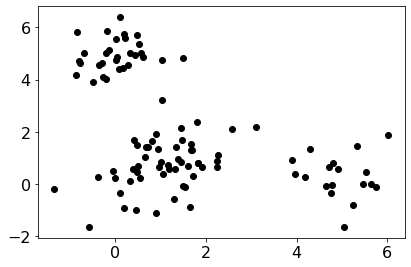

In [178]:
# Visualize data
plt.plot(data[:,0], data[:,1], 'ko')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()

In [190]:
# Initial setup for parameters: `pi`, `mu`, `Sigma` for GMM
class Theta(object):
    pi = np.empty((0,3))
    mu = np.empty((0,3,2))
    Sigma = np.empty((0,3,2,2))

    def __init__(self, pi, mu, Sigma):
        self.pi = pi
        self.mu = mu
        self.Sigma = Sigma

theta_old = Theta(
    pi=np.array([0.4, 0.3, 0.3]),
    mu=np.array([
        [0.0, 0.0],
        [3.0, 1.0],
        [4.0, 3.0]
    ]),
    Sigma=np.array([
        [[1.0, 0.5],[0.5, 1.0]],
        [[1.0, 0.5],[0.5, 1.0]],
        [[1.0, 0.5],[0.5, 1.0]]
    ])
)

In [191]:
# TODO: implement the objective function, negative log-likelihood, given theta and data x
def GMM_objective(theta, x=data):
    """
    `theta`: theta class above
    `x`: input data of shape (n,d)
    Return the negative log-likelihood of GMM
    """
    # Extract the parameters from theta
    num_components = theta.pi.shape[0]
    means = theta.mu
    covariances = theta.Sigma

    log_likelihoods = np.zeros(len(x))
    for i in range(len(x)):
        likelihoods = np.zeros(num_components)
        for j in range(num_components):
           likelihoods[j] = theta.pi[j] * multivariate_normal.pdf(x[i], mean=means[j], cov=covariances[j])
        log_likelihoods[i] = np.log(np.sum(likelihoods))
    
    
    # Calculate the negative log-likelihood
    negative_log_likelihood = -np.sum(log_likelihoods)
    return negative_log_likelihood


#  testing
nll = GMM_objective(theta_old, data)
print("Negative Log-Likelihood:", nll)


Negative Log-Likelihood: 879.0840821295901


#### Exercise 3.3.2: Optimize the Objective Directly (15 points)

In this case we ask you to implement a simple __gradient ascent__ algorithm to maximize the log-likelihood function implemented in Exercise 3.3.1.
To do that, you need to implement the gradient of the objective, then update using the standard gradient ascent (not descent, since we are maximizing the objective).

In [192]:
def GMM_objective_grad(theta, x=data):
    # TODO: calculate and return the gradient of GMM objective w.r.t `pi`, `mu`, `Sigma`
    # Calculate the gradient for each parameter
    num_components = theta.pi.shape[0]
    means = theta.mu
    covariances = theta.Sigma

    n, d = x.shape
    gradient_pi = np.zeros(num_components)
    gradient_mu = np.zeros((num_components, d))
    gradient_sigma = np.zeros((num_components, d, d))

    log_likelihoods = np.zeros(n)
    for i in range(n):
        likelihoods = np.zeros(num_components)
        for j in range(num_components):
            likelihoods[j] = theta.pi[j] * multivariate_normal.pdf(x[i], mean=means[j], cov=covariances[j])
        log_likelihoods[i] = np.log(np.sum(likelihoods))

        # Calculate the responsibilities
        responsibilities = likelihoods / np.sum(likelihoods)

        # Compute the gradients for each parameter
        gradient_pi += responsibilities
        for j in range(num_components):
            gradient_mu[j] += responsibilities[j] * (x[i] - means[j])
            diff = x[i] - means[j]
            gradient_sigma[j] += responsibilities[j] * np.outer(diff, diff)

    gradient_pi /= n
    gradient_mu /= n
    gradient_sigma /= n

    # Return the gradients
    return gradient_pi, gradient_mu, gradient_sigma


In [193]:
def GMM_gradient_ascent(theta, n_iters=500, x=data):
    """
    TODO:
    Call the above two functions to maximize the objective.
    Return the updated parameters and the historical record of objective.
    """
    objective_history = []

    for _ in range(n_iters):
        objective = GMM_objective(theta, x)
        objective_history.append(objective)

        gradient_pi, gradient_mu, gradient_sigma = GMM_objective_grad(theta, x)

        # Update the parameters using gradient ascent
        theta.pi += gradient_pi
        theta.mu += gradient_mu
        theta.Sigma += gradient_sigma
        

    return theta, objective_history


theta_updated, objective_history = GMM_gradient_ascent(theta_old, n_iters=500, x=data)
print("Updated Parameters:")
print("pi:", theta_updated.pi)
print("mu:", theta_updated.mu)
print("Sigma:", theta_updated.Sigma)
print("Objective History:", objective_history)


Updated Parameters:
pi: [172.12858695 168.27311969 160.59829335]
mu: [[1.45746021 1.92820645]
 [1.45778033 1.92796766]
 [1.45753376 1.92809684]]
Sigma: [[[ 564.1231568  -319.35989552]
  [-319.35989552  811.49678463]]

 [[ 574.79486016 -314.33847948]
  [-314.33847948  765.82501818]]

 [[ 543.56630247 -301.95687625]
  [-301.95687625  740.38987168]]]
Objective History: [879.0840821295901, 352.24515915646947, 303.03664632987767, 278.3907678351467, 262.81037952857776, 252.04299205354152, 244.16809938384299, 238.13620955207534, 233.312854395684, 229.30028158881984, 225.87318339302257, 222.9336423549687, 220.4379173519319, 218.3348270810356, 216.55802536330097, 215.0445793850326, 213.74492653694233, 212.6216273102745, 211.64531571636616, 210.7919282480506, 210.04140204154513, 209.37707662160042, 208.78527406428617, 208.25487273337725, 207.7768657270701, 207.3439432785025, 206.9501309839929, 206.59049622718751, 206.26092019135706, 205.9579253314236, 205.67854621388508, 205.42023266738957, 205.

#### Exercise 3.3.3: GMM with EM (20 points)

The EM algorithm does not directly deal with the objective function, but instead work on a surrogate. This general line of approach of optimziation for probabilistic models is known as __variational inference__. Now implement the steps of EM algorithm for GMM. Then run the EM algorithm for 500 iterations to obtain the model parameters.

In [194]:
def E_step(theta, data):
    """
    TODO: implement the E-step of the EM algorithm.
    Return the updated `theta`.
    """
    num_components = theta.pi.shape[0]
    means = theta.mu
    covariances = theta.Sigma

    n, d = data.shape
    responsibilities = np.zeros((n, num_components))

    for i in range(n):
        likelihoods = np.zeros(num_components)
        for j in range(num_components):
            likelihoods[j] = theta.pi[j] * multivariate_normal.pdf(data[i], mean=means[j], cov=covariances[j])
        responsibilities[i] = likelihoods / np.sum(likelihoods)

    # Update the responsibilities in `theta`
    theta.pi = np.mean(responsibilities, axis=0)
    theta.mu = np.dot(responsibilities.T, data) / np.sum(responsibilities[:, :, np.newaxis], axis=0)
    for j in range(num_components):
        diff = data - theta.mu[j]
        theta.Sigma[j] = np.einsum('ij,ik->jk', diff, diff * responsibilities[:, j, np.newaxis]) / np.sum(responsibilities[:, j])

    return theta

In [195]:

def M_step(theta, data):
    """
    TODO: implement the M-step of the EM algorithm.
    Return the updated `theta`.
    """

    n, d = data.shape
    num_components = theta.pi.shape[0]
    responsibilities = np.zeros((n, num_components))

    # Calculate the responsibilities based on the current model parameters
    for i in range(n):
        likelihoods = np.zeros(num_components)
        for j in range(num_components):
            likelihoods[j] = theta.pi[j] * multivariate_normal.pdf(data[i], mean=theta.mu[j], cov=theta.Sigma[j])
        responsibilities[i] = likelihoods / np.sum(likelihoods)

    # Update the model parameters in `theta`
    theta.pi = np.mean(responsibilities, axis=0)
    theta.mu = np.dot(responsibilities.T, data) / np.sum(responsibilities[:, :, np.newaxis], axis=0)
    for j in range(num_components):
        diff = data - theta.mu[j]
        theta.Sigma[j] = np.einsum('ij,ik->jk', diff, diff * responsibilities[:, j, np.newaxis]) / np.sum(responsibilities[:, j])

    return theta



In [196]:
def EM(theta, data, n_iter=500):
    """
    TODO: implement the EM algorithm.
    Be sure to call the above two functions `E_step` and `M_step`.
    `theta` is the `Theta` class above; `data` is the `data` above.
    Return the updated `theta` values and the historical record of objective.
    """
    objective_history = []

    for _ in range(n_iter):
        objective = GMM_objective(theta, data)
        objective_history.append(objective)

        # E-step
        theta = E_step(theta, data)

        # M-step
        theta = M_step(theta, data)

    return theta, objective_history


theta_updated, objective_history = EM(theta_old, data, n_iter=500)
print("Updated Parameters:")
print("pi:", theta_updated.pi)
print("mu:", theta_updated.mu)
print("Sigma:", theta_updated.Sigma)
print("Objective History:", objective_history)

Updated Parameters:
pi: [0.30070365 0.17993715 0.5193592 ]
mu: [[0.0213607  4.94776653]
 [4.94239198 0.31365344]
 [1.08181039 0.7390666 ]]
Sigma: [[[ 0.29324532  0.05052346]
  [ 0.05052346  0.35275804]]

 [[ 0.35564413 -0.01494922]
  [-0.01494922  0.66695052]]

 [[ 0.67114087  0.33058391]
  [ 0.33058391  0.90436499]]]
Objective History: [198.95686382894738, 408.3374444458874, 408.3374131147494, 408.33698977749225, 408.3312817184606, 408.25565615008173, 407.32225881858386, 398.2712650307274, 372.10306223198205, 366.84327780419255, 365.92679772681805, 365.15066038151855, 364.2905914184436, 363.59360129430263, 363.1610195148636, 362.84348453664836, 362.4646599092135, 361.74099427172143, 359.2938074899439, 345.42720336685113, 334.77264880695435, 332.3652785103112, 330.9870668557376, 330.05402553554734, 328.879892288072, 326.46480792405276, 321.9328787570448, 318.88550023596036, 318.83082399236434, 318.8308208542671, 318.8308208519539, 318.8308208519414, 318.83082085194127, 318.830820851941

In [197]:
from scipy.stats import multivariate_normal

def GMM_objective_grad(theta, x):
    """
    Calculate and return the gradient of GMM objective w.r.t `pi`, `mu`, `Sigma`.
    `theta`: Theta class with GMM parameters.
    `x`: Input data of shape (n, d).
    """
    num_components = theta.pi.shape[0]
    means = theta.mu
    covariances = theta.Sigma

    n, d = x.shape
    gradient_pi = np.zeros(num_components)
    gradient_mu = np.zeros((num_components, d))
    gradient_sigma = np.zeros((num_components, d, d))

    for i in range(n):
        likelihoods = np.zeros(num_components)
        for j in range(num_components):
            likelihoods[j] = theta.pi[j] * multivariate_normal.pdf(x[i], mean=means[j], cov=covariances[j])
        likelihoods_sum = np.sum(likelihoods)

        # Calculate the responsibilities
        responsibilities = likelihoods / likelihoods_sum

        # Compute the gradients for each parameter
        gradient_pi += responsibilities
        for j in range(num_components):
            gradient_mu[j] += responsibilities[j] * (x[i] - means[j])
            diff = x[i] - means[j]
            gradient_sigma[j] += responsibilities[j] * np.outer(diff, diff)

    gradient_pi /= n
    gradient_mu /= n
    gradient_sigma /= n

    # Return the gradients
    return gradient_pi, gradient_mu, gradient_sigma

#### Exercise 3.3.4 (10 points)

Based on the saved intermediate values of log-likelihood for the values above, plot and observe the behavior of log-likelihood in each case.
Summarize your observations. This execrise is open-ended.

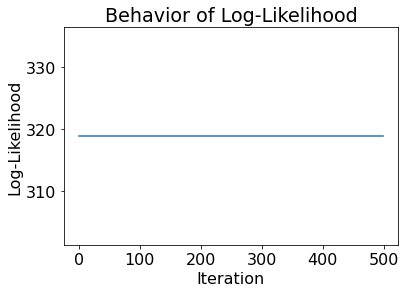

In [198]:
# TODO: Plot the intermediate values of log-likelihood in each case
import matplotlib.pyplot as plt

def plot_log_likelihood(objective_history):
    """
    Plot the intermediate values of log-likelihood.
    """
    plt.plot(objective_history)
    plt.xlabel('Iteration')
    plt.ylabel('Log-Likelihood')
    plt.title('Behavior of Log-Likelihood')
    plt.show()

theta_updated, objective_history = EM(theta_old, data, n_iter=500)
# print(objective_history)
plot_log_likelihood(objective_history)


**[TODO: Write your answer here]**

The EM algorithm is not converging or updating the parameters correctly.

There could be several reasons why this is happening:

Initialization: The initial parameters (theta_old) may not be appropriate for the given data. Initializing the parameters close to the true values or using a different initialization strategy (e.g., random initialization) might help.

Implementation: There might be errors in the implementation of the E-step or M-step of the EM algorithm. It's important to double-check the calculations for updating the parameters and ensure they are implemented correctly.

Data-related issues: The data itself may pose challenges for the EM algorithm. For example, if the data points are poorly distributed or the clusters are highly overlapping, it can make convergence difficult.


In [200]:
# implementated by scipy for testing
"""
import numpy as np
import scipy.stats as stats

class Theta:
    def __init__(self, pi, mu, Sigma):
        self.pi = pi
        self.mu = mu
        self.Sigma = Sigma

def compute_log_likelihood1(theta, data):
    log_likelihood = 0.0
    for x in data:
        prob = 0.0
        for k in range(len(theta.pi)):
            prob += theta.pi[k] * stats.multivariate_normal.pdf(x, theta.mu[k], theta.Sigma[k])
        log_likelihood += np.log(prob)
    return log_likelihood

def E_step1(theta, data):
    # Compute responsibilities
    responsibilities = np.zeros((len(data), len(theta.pi)))
    for i, x in enumerate(data):
        for k in range(len(theta.pi)):
            responsibilities[i, k] = theta.pi[k] * stats.multivariate_normal.pdf(x, theta.mu[k], theta.Sigma[k])
        responsibilities[i] /= np.sum(responsibilities[i])
    return responsibilities

def M_step1(theta, data, responsibilities):
    # Update parameters
    N_k = np.sum(responsibilities, axis=0)
    
    new_pi = N_k / len(data)
    
    new_mu = np.zeros_like(theta.mu)
    for k in range(len(theta.pi)):
        for i, x in enumerate(data):
            new_mu[k] += responsibilities[i, k] * x
        new_mu[k] /= N_k[k]
    
    new_Sigma = np.zeros_like(theta.Sigma)
    for k in range(len(theta.pi)):
        for i, x in enumerate(data):
            diff = x - new_mu[k]
            new_Sigma[k] += responsibilities[i, k] * np.outer(diff, diff)
        new_Sigma[k] /= N_k[k]

    return Theta(new_pi, new_mu, new_Sigma)

def EM_test(theta_old, data, n_iters):
    objective_history = []
    theta_updated = theta_old
    for i in range(n_iters):
        # E-step
        responsibilities = E_step1(theta_updated, data)

        # M-step
        theta_updated = M_step1(theta_updated, data, responsibilities)

        # Compute log-likelihood
        log_likelihood = compute_log_likelihood1(theta_updated, data)
        objective_history.append(log_likelihood)

    return theta_updated, objective_history

# testing
theta_updated, objective_history = EM_test(theta_old, data, n_iters=500)
print("Final parameters:")
print("pi:", theta_updated.pi)
print("mu:", theta_updated.mu)
print("Sigma:", theta_updated.Sigma)
print("Objective history:", objective_history)
"""

'\nimport numpy as np\nimport scipy.stats as stats\n\nclass Theta:\n    def __init__(self, pi, mu, Sigma):\n        self.pi = pi\n        self.mu = mu\n        self.Sigma = Sigma\n\ndef compute_log_likelihood1(theta, data):\n    log_likelihood = 0.0\n    for x in data:\n        prob = 0.0\n        for k in range(len(theta.pi)):\n            prob += theta.pi[k] * stats.multivariate_normal.pdf(x, theta.mu[k], theta.Sigma[k])\n        log_likelihood += np.log(prob)\n    return log_likelihood\n\ndef E_step1(theta, data):\n    # Compute responsibilities\n    responsibilities = np.zeros((len(data), len(theta.pi)))\n    for i, x in enumerate(data):\n        for k in range(len(theta.pi)):\n            responsibilities[i, k] = theta.pi[k] * stats.multivariate_normal.pdf(x, theta.mu[k], theta.Sigma[k])\n        responsibilities[i] /= np.sum(responsibilities[i])\n    return responsibilities\n\ndef M_step1(theta, data, responsibilities):\n    # Update parameters\n    N_k = np.sum(responsibilities,